# CSE474/574 - Programming Assignment 1

For grading, we will execute the submitted notebook as follows:

```shell
jupyter nbconvert --to python PA1Script.ipynb
python PA1Script.py
```

In [96]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pickle

## Part 1 - Linear Regression

### Problem 1 - Linear Regression with Direct Minimization

In [97]:
print('PROBLEM 1')
print('----------')

PROBLEM 1
----------


In [98]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 
    w = np.linalg.inv(X.T @ X) @ (X.T @ y)
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    #w = np.zeros((X.shape[0],1))
    return w

In [99]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # rmse = scalar value
    N = len(Xtest)
    RSS = np.sum([(ytest[i]-(w.T @ Xtest[i]))**2 for i in range(N)])
    rmse = np.sqrt((1/N)* RSS)
    return rmse

In [100]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
x1 = np.ones((len(Xtrain),1))
x2 = np.ones((len(Xtest),1))

Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(Xtrain,ytrain)
w_i = learnOLERegression(Xtrain_i,ytrain)

rmse = testOLERegression(w,Xtrain,ytrain)
rmse_i = testOLERegression(w_i,Xtrain_i,ytrain)
print('RMSE without intercept on train data - %.2f'%rmse)
print('RMSE with intercept on train data - %.2f'%rmse_i)

rmse = testOLERegression(w,Xtest,ytest)
rmse_i = testOLERegression(w_i,Xtest_i,ytest)
print('RMSE without intercept on test data - %.2f'%rmse)
print('RMSE with intercept on test data - %.2f'%rmse_i)


RMSE without intercept on train data - 138.20
RMSE with intercept on train data - 46.77
RMSE without intercept on test data - 326.76
RMSE with intercept on test data - 60.89


### Problem 2 - Linear Regression with Gradient Descent

In [101]:
print('PROBLEM 2')
print('----------')

PROBLEM 2
----------


In [102]:
def regressionObjVal(w, X, y):

    # compute squared error (scalar) with respect
    # to w (vector) for the given data X and y      
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar value
    
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    Xw = np.dot(X, w)
    J = 0.5 * np.dot(np.transpose(y-Xw), (y-Xw))
    
    error = 0
    return error


In [103]:
def regressionGradient(w, X, y):

    # compute gradient of squared error (scalar) with respect
    # to w (vector) for the given data X and y   
    
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # gradient = d length vector (not a d x 1 matrix)

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE 
    # error_grad = np.zeros((X.shape[1],))
    # X'Xw - X'y
    error_grad = (np.dot(np.dot(np.transpose(X), X), w) - np.dot(np.transpose(X), y)).shape[1]
    return error_grad

In [104]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
rmse = testOLERegression(w,Xtrain_i,ytrain)
print('Gradient Descent Linear Regression RMSE on train data - %.2f'%rmse)
rmse = testOLERegression(w,Xtest_i,ytest)
print('Gradient Descent Linear Regression RMSE on test data - %.2f'%rmse)

[[3378109. 3378109. 3378109. ... 3378109. 3378109. 3378109.]
 [3378109. 3378109. 3378109. ... 3378109. 3378109. 3378109.]
 [3378109. 3378109. 3378109. ... 3378109. 3378109. 3378109.]
 ...
 [3378109. 3378109. 3378109. ... 3378109. 3378109. 3378109.]
 [3378109. 3378109. 3378109. ... 3378109. 3378109. 3378109.]
 [3378109. 3378109. 3378109. ... 3378109. 3378109. 3378109.]]
[[3391147.33028292 3400110.63593614 3391308.69298743 ... 3411470.49701884
  3410213.63976406 3396814.23715986]
 [3400110.63593614 3409103.61600439 3400272.53285693 ... 3420501.08567098
  3419240.06739511 3405796.30398816]
 [3391308.69298743 3400272.53285693 3391470.06530922 ... 3411633.07099151
  3410376.13882757 3396975.93761409]
 ...
 [3411470.49701884 3420501.08567098 3411633.07099151 ... 3431946.21948125
  3430679.92763519 3417179.94249751]
 [3410213.63976406 3419240.06739511 3410376.13882757 ... 3430679.92763519
  3429414.21925797 3415920.45450358]
 [3396814.23715986 3405796.30398816 3396975.93761409 ... 3417179.942

[[3378109.00000004 3378109.00000007 3378109.00000004 ... 3378109.00000011
  3378109.00000011 3378109.00000006]
 [3378109.00000007 3378109.0000001  3378109.00000007 ... 3378109.00000014
  3378109.00000014 3378109.00000009]
 [3378109.00000004 3378109.00000007 3378109.00000004 ... 3378109.00000011
  3378109.00000011 3378109.00000006]
 ...
 [3378109.00000011 3378109.00000014 3378109.00000011 ... 3378109.00000018
  3378109.00000018 3378109.00000013]
 [3378109.00000011 3378109.00000014 3378109.00000011 ... 3378109.00000018
  3378109.00000017 3378109.00000013]
 [3378109.00000006 3378109.00000009 3378109.00000006 ... 3378109.00000013
  3378109.00000013 3378109.00000008]]
[[3378109.         3378109.00000001 3378109.         ... 3378109.00000001
  3378109.00000001 3378109.        ]
 [3378109.00000001 3378109.00000001 3378109.00000001 ... 3378109.00000002
  3378109.00000002 3378109.00000001]
 [3378109.         3378109.00000001 3378109.         ... 3378109.00000001
  3378109.00000001 3378109.     

 [3378109. 3378109. 3378109. ... 3378109. 3378109. 3378109.]]
[[3378109. 3378109. 3378109. ... 3378109. 3378109. 3378109.]
 [3378109. 3378109. 3378109. ... 3378109. 3378109. 3378109.]
 [3378109. 3378109. 3378109. ... 3378109. 3378109. 3378109.]
 ...
 [3378109. 3378109. 3378109. ... 3378109. 3378109. 3378109.]
 [3378109. 3378109. 3378109. ... 3378109. 3378109. 3378109.]
 [3378109. 3378109. 3378109. ... 3378109. 3378109. 3378109.]]
[[3378109. 3378109. 3378109. ... 3378109. 3378109. 3378109.]
 [3378109. 3378109. 3378109. ... 3378109. 3378109. 3378109.]
 [3378109. 3378109. 3378109. ... 3378109. 3378109. 3378109.]
 ...
 [3378109. 3378109. 3378109. ... 3378109. 3378109. 3378109.]
 [3378109. 3378109. 3378109. ... 3378109. 3378109. 3378109.]
 [3378109. 3378109. 3378109. ... 3378109. 3378109. 3378109.]]
[[3378109. 3378109. 3378109. ... 3378109. 3378109. 3378109.]
 [3378109. 3378109. 3378109. ... 3378109. 3378109. 3378109.]
 [3378109. 3378109. 3378109. ... 3378109. 3378109. 3378109.]
 ...
 [3378

[[3378207.25573157 3378274.72162348 3378208.47029227 ... 3378360.22614486
  3378350.76590787 3378249.90996446]
 [3378274.72162348 3378342.18920464 3378275.93621459 ... 3378427.69586694
  3378418.23539307 3378317.37692437]
 [3378208.47029227 3378275.93621459 3378209.68485352 ... 3378361.44077451
  3378351.98053326 3378251.12454439]
 ...
 [3378360.22614486 3378427.69586694 3378361.44077451 ... 3378513.20524257
  3378503.74446851 3378402.88279931]
 [3378350.76590787 3378418.23539307 3378351.98053326 ... 3378503.74446851
  3378494.28372765 3378393.42241256]
 [3378249.90996446 3378317.37692437 3378251.12454439 ... 3378402.88279931
  3378393.42241256 3378292.56487258]]
[[3378151.66835418 3378180.96581783 3378152.19578437 ... 3378218.0966633
  3378213.98849929 3378170.19120776]
 [3378180.96581783 3378210.26360004 3378181.49325375 ... 3378247.39484925
  3378243.28664057 3378199.48887282]
 [3378152.19578437 3378181.49325375 3378152.72321466 ... 3378218.62410649
  3378214.51594167 3378170.718641

## Part 2 - Linear Classification

### Problem 3 - Perceptron using Gradient Descent

In [105]:
print('PROBLEM 3')
print('----------')

PROBLEM 3
----------


In [106]:
def predictLinearModel(w,Xtest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # Output:
    # ypred = N x 1 vector of predictions

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    ypred = np.zeros([Xtest.shape[0],1])
    return ypred

In [107]:
def evaluateLinearModel(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # acc = scalar values

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    acc = 0
    return acc

In [108]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Perceptron Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Perceptron Accuracy on test data - %.2f'%acc)

[[50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]
 ...
 [50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]]
[[ 133.0788732   237.94329677  105.10652738 ...  504.63907727
   292.61841104  348.03799118]
 [ 237.94329677  474.6625873   174.79896592 ... 1076.69742236
   598.08532516  723.18860847]
 [ 105.10652738  174.79896592   86.51622836 ...  352.04381845
   211.13580841  247.96741965]
 ...
 [ 504.63907727 1076.69742236  352.04381845 ... 2531.5811822
  1374.96211811 1677.2880378 ]
 [ 292.61841104  598.08532516  211.13580841 ... 1374.96211811
   757.35228977  918.78786105]
 [ 348.03799118  723.18860847  247.96741965 ... 1677.2880378
   918.78786105 1117.05042704]]
[[ 55.32431381  61.088592    53.78670575 ...  75.74855598  64.0940209
   67.14037224]
 [ 61.088592    72.7396625   57.98069552 ... 102.37117368  78.81439775
   84.97184766]
 [ 53.78670575  57.98069552  52.66796854 ...  68.64703342  60.16739395
  

[[50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]
 ...
 [50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]]
[[50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]
 ...
 [50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]]
[[50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]
 ...
 [50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]]
[[50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]
 ...
 [50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]]
[[50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]
 ...
 [50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]
 [50. 50. 50. ... 50. 50. 50.]]
[[50. 50. 50. ... 50. 50. 50.]
 [50. 50.

Perceptron Accuracy on train data - 0.00
Perceptron Accuracy on test data - 0.00


### Problem 4 - Logistic Regression Using Newton's Method

In [109]:
print('PROBLEM 4')
print('----------')

PROBLEM 4
----------


In [110]:
def logisticObjVal(w, X, y):

    # compute log-loss error (scalar) with respect
    # to w (vector) for the given data X and y                               
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar
    
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    error = 0
    return error


In [111]:
def logisticGradient(w, X, y):

    # compute the gradient of the log-loss error (vector) with respect
    # to w (vector) for the given data X and y  
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = d length gradient vector (not a d x 1 matrix)

    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    gradient = np.zeros((w.shape[0],))
    return gradient

In [112]:
def logisticHessian(w, X, y):

    # compute the Hessian of the log-loss error (matrix) with respect
    # to w (vector) for the given data X and y                               
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # Hessian = d x d matrix
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    hessian = np.eye(X.shape[1])
    return hessian

In [113]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
w = np.transpose(np.array(soln.x))
w = np.reshape(w,[len(w),1])
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Logistic Regression Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Logistic Regression Accuracy on test data - %.2f'%acc)

Logistic Regression Accuracy on train data - 0.00
Logistic Regression Accuracy on test data - 0.00


### Problem 5 - Support Vector Machines Using Gradient Descent

In [114]:
print('PROBLEM 5')
print('----------')

PROBLEM 5
----------


In [115]:
def trainSGDSVM(X,y,T,eta=0.01):
    # learn a linear SVM by implementing the SGD algorithm
    #
    # Inputs:
    # X = N x d
    # y = N x 1
    # T = number of iterations
    # eta = learning rate
    # Output:
    # weight vector, w = d x 1
    
    # IMPLEMENT THIS METHOD
    w = np.zeros([X.shape[1],1])
    for t in range(T):
        i = np.random.randint(0,len(X))
        Xi = np.matrix(X[i])
        yi = np.matrix(y[i])
        if yi @ w.T @ Xi.T < 1:
            w = w + eta * (yi @ Xi).T
    return w

In [116]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
w = trainSGDSVM(Xtrain_i,ytrain,200,0.01)
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('SVM Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('SVM Accuracy on test data - %.2f'%acc)

SVM Accuracy on train data - 0.00
SVM Accuracy on test data - 0.00


### Problem 6 - Plotting decision boundaries

In [117]:
print('Problem 6')
print('---------')

Problem 6
---------


In [118]:
def plotBoundaries(w,X,y):
    # plotting boundaries

    mn = np.min(X,axis=0)
    mx = np.max(X,axis=0)
    x1 = np.linspace(mn[1],mx[1],100)
    x2 = np.linspace(mn[2],mx[2],100)
    xx1,xx2 = np.meshgrid(x1,x2)
    xx = np.zeros((x1.shape[0]*x2.shape[0],2))
    xx[:,0] = xx1.ravel()
    xx[:,1] = xx2.ravel()
    xx_i = np.concatenate((np.ones((xx.shape[0],1)), xx), axis=1)
    ypred = predictLinearModel(w,xx_i)
    ax.contourf(x1,x2,ypred.reshape((x1.shape[0],x2.shape[0])),alpha=0.3,cmap='cool')
    ax.scatter(X[:,1],X[:,2],c=y.flatten())

Text(0.5, 1.0, 'SVM')

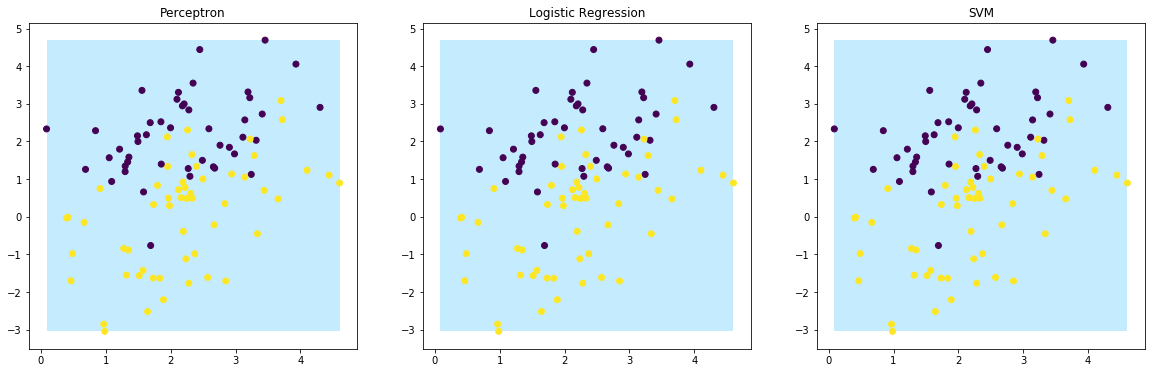

In [119]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

# Replace next three lines with code for learning w using the three methods
w_perceptron = np.zeros((Xtrain_i.shape[1],1))
w_logistic = np.zeros((Xtrain_i.shape[1],1))
w_svm = np.zeros((Xtrain_i.shape[1],1))
fig = plt.figure(figsize=(20,6))

ax = plt.subplot(1,3,1)
plotBoundaries(w_perceptron,Xtrain_i,ytrain)
ax.set_title('Perceptron')

ax = plt.subplot(1,3,2)
plotBoundaries(w_logistic,Xtrain_i,ytrain)
ax.set_title('Logistic Regression')

ax = plt.subplot(1,3,3)
plotBoundaries(w_svm,Xtrain_i,ytrain)
ax.set_title('SVM')
